In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('DA Drive Assignment.xlsx',sheet_name = 'dataset')

In [3]:
df.columns

Index(['submission_id', 'submission_date', 'ph_num', 'AC_num', 'AC', 'age',
       'gender', 'religion', 'ls_19', 'vs_17', 'caste', 'satisfation_cm',
       'satisfation_PM', 'mla_satisfaction', 'mla_choice', 'cm_choice'],
      dtype='object')

In [5]:
q_1 = df.groupby('ls_19').count()
q_1

,submission_id,submission_date,ph_num,AC_num,AC,age,gender,religion,vs_17,caste,satisfation_cm,satisfation_PM,mla_satisfaction,mla_choice,cm_choice
ls_19,,,,,,,,,,,,,,,
BJP,1171,1171,1171,1171,1171,1171,1171,1171,1171,1165,1171,1171,966,1171,1171
Did Not Vote,156,156,156,156,156,156,156,156,156,155,156,156,117,156,156
Do Not Remember,44,44,44,44,44,44,44,44,44,44,44,44,31,44,44
INC,25,25,25,25,25,25,25,25,25,24,25,25,21,25,25
MGB,550,550,550,550,550,550,550,550,550,548,550,550,422,550,550
NOTA,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Others,19,19,19,19,19,19,19,19,19,19,19,19,15,19,19
PSP,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
# Name of the Assembly constituencies
solve = q_1['AC']
solve

ls_19
BJP                1171
Did Not Vote        156
Do Not Remember      44
INC                  25
MGB                 550
NOTA                  2
Others               19
PSP                   1
Name: AC, dtype: int64

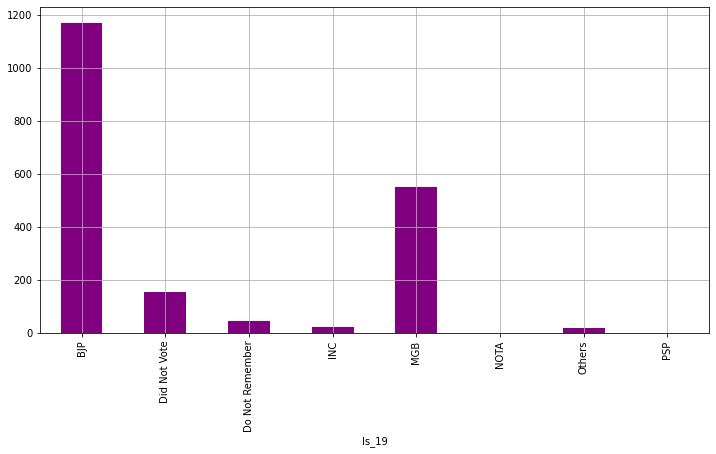

In [15]:
plt.figure(figsize = (12,6))
solve.plot.bar(color ='purple')
plt.grid()

In [40]:
bjp_ac = df[["AC",'ls_19']].groupby('ls_19').max()
#max_vote = bjp_ac.value_counts('AC')
#max_vote
bjp_ac

,AC
ls_19,
BJP,हुसैनगंज
Did Not Vote,हुसैनगंज
Do Not Remember,हंडिआ
INC,सरेनी
MGB,हरैया
NOTA,सिकंदरपुर
Others,सैदपुर
PSP,मोदी नगर


In [41]:
date = df['submission_date']

In [43]:
df['day'] =date.dt.day

In [45]:
df.head(1)

,submission_id,submission_date,ph_num,AC_num,AC,age,gender,religion,ls_19,vs_17,caste,satisfation_cm,satisfation_PM,mla_satisfaction,mla_choice,cm_choice,month,day
0,6120bc89ca8f372491f4c520,2021-08-21 11:40:25,7.460973e+09,332.0,फाजिलनगर,30.0,Female,Hindu,Did Not Vote,BJP,यादव (Yadav),पूरी तरह से संतुष्ट,कुछ हद तक संतुष्ट,NaN,भाजपा - गंगा सिंह कुशवाहा,अखिलेश यादव,8,21


<AxesSubplot:>

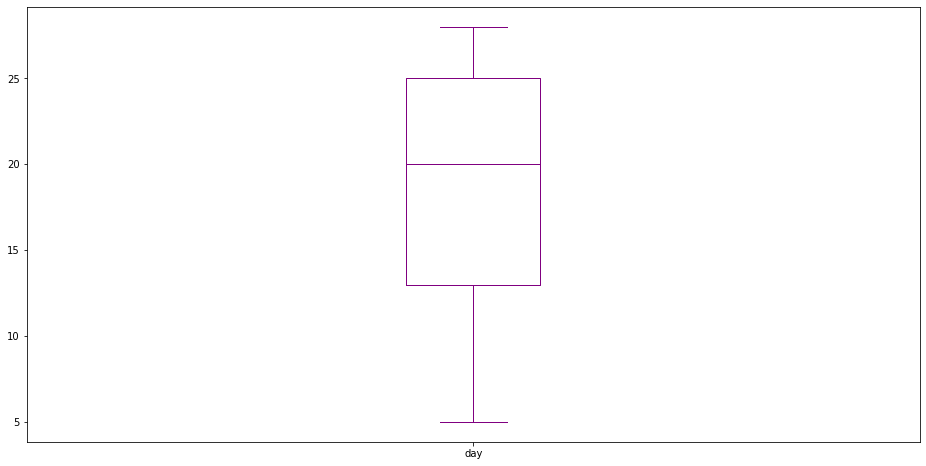

In [49]:
plt.figure(figsize = (16,8))
df['day'].plot.box(color ='purple')



In [54]:
yeah_date = df['day'].value_counts()

Text(0, 0.5, 'day of submission')

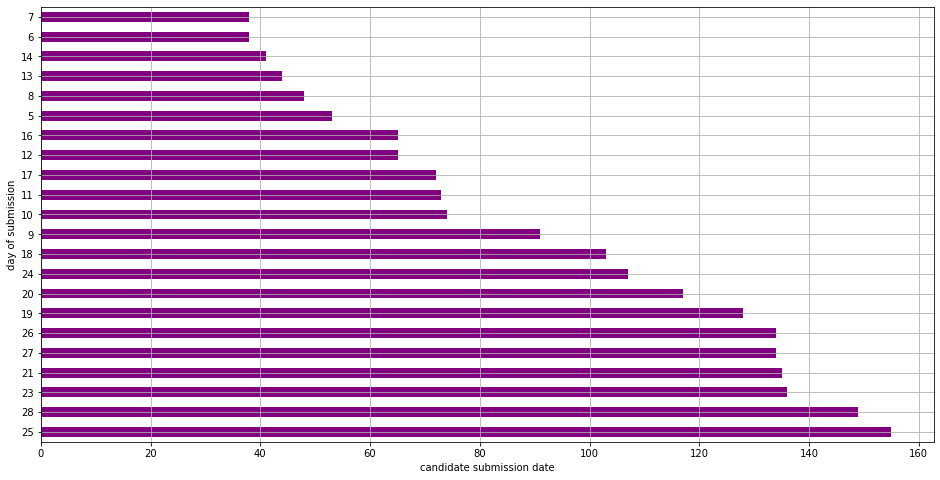

In [61]:
plt.figure(figsize = (16,8))
yeah_date.plot.barh(color ='purple')
plt.grid()
plt.xlabel('candidate submission date')
plt.ylabel('day of submission')

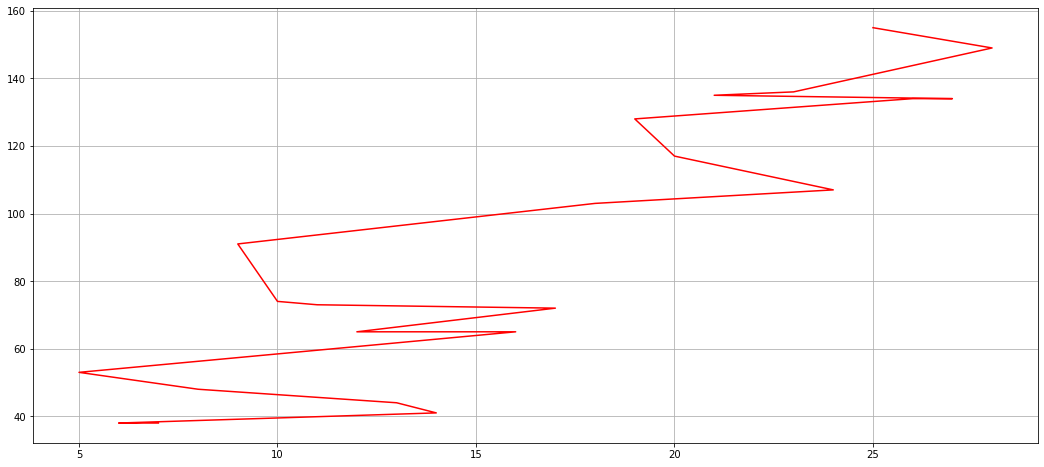

In [65]:
plt.figure(figsize =(18,8))
yeah_date.plot(color = 'red')
plt.grid()

In [77]:
mask = df['submission_date']> '2021-08-24 12:00:00'

### List the number of samples that were brought in after 12 pm on 2021-08-24

In [79]:
after_12 = df.loc[mask]
after_12

,submission_id,submission_date,ph_num,AC_num,AC,age,gender,religion,ls_19,vs_17,caste,satisfation_cm,satisfation_PM,mla_satisfaction,mla_choice,cm_choice,month,day
3,6128bedbcdab7333f2db1ac9,2021-08-27 15:05:18,9.198255e+09,316.0,नौतनवां,35.0,Male,Muslim,BJP,SP,Muslim,पूरी तरह से असंतुष्ट,पूरी तरह से असंतुष्ट,पूरी तरह असंतुष्ट,सपा - कौशल किशोर सिंह उर्फ ​​मुन्ना सिंह,अखिलेश यादव,8,27
6,6125f07e2475305cc454f4f3,2021-08-25 12:12:32,8.840051e+09,258.0,हंडिआ,35.0,Male,Hindu,BJP,SP,यादव (Yadav),पूरी तरह से असंतुष्ट,कुछ हद तक संतुष्ट,पूरी तरह असंतुष्ट,सपा - प्रशांत नारायण सिंह,अखिलेश यादव,8,25
14,6128df6f1a296b33ec8cd8d3,2021-08-27 17:50:57,7.054182e+09,188.0,सुल्तानपुर,23.0,Male,Hindu,BJP,BJP,ब्राह्मण (Brahmin),पूरी तरह से संतुष्ट,पूरी तरह से संतुष्ट,पूरी तरह असंतुष्ट,भाजपा - प्रवीण अग्रवाल,अखिलेश यादव,8,27
15,612757cd2475305cc456133f,2021-08-26 12:53:29,7.838145e+09,159.0,बिलग्राम मल्लावां,55.0,Female,Hindu,BJP,BJP,चमार / जाटव (Chamar / Jatav),पूरी तरह से असंतुष्ट,पूरी तरह से असंतुष्ट,NaN,बसपा से कोई भी,बसपा से कोई भी,8,26
16,6128e47e1a296b33ec8ce019,2021-08-27 18:05:57,7.417551e+09,204.0,औरैया,29.0,Male,Hindu,BJP,BJP,ठाकुर (Thakur),पूरी तरह से संतुष्ट,पूरी तरह से संतुष्ट,पूरी तरह संतुष्ट,भाजपा से कोई भी,योगी आदित्यनाथ,8,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,6127970282c0665cd0514e4e,2021-08-26 09:51:18,9.918682e+09,293.0,उतरौला,55.0,Male,Muslim,BJP,BJP,Muslim,कुछ हद तक असंतुष्ट,कुछ हद तक असंतुष्ट,पूरी तरह संतुष्ट,भाजपा - राम दयाल यादव,अखिलेश यादव,8,26
1986,6128baa6cdab7333f2db09dc,2021-08-27 15:30:28,7.398151e+09,333.0,कुशीनगर,28.0,Male,Hindu,BJP,BJP,दुसाध (Dusadh),पूरी तरह से संतुष्ट,पूरी तरह से संतुष्ट,पूरी तरह संतुष्ट,भाजपा - पीएन पाठक,योगी आदित्यनाथ,8,27
1989,61274eb282c0665cd050c141,2021-08-26 12:45:08,9.648517e+09,343.0,अतरौलिया,20.0,Female,Hindu,Did Not Vote,Did Not Vote,अन्य,पूरी तरह से संतुष्ट,पूरी तरह से संतुष्ट,NaN,भाजपा से कोई भी,भाजपा से कोई भी,8,26
1990,61273c448206875c968d9b22,2021-08-26 12:12:24,9.026369e+09,280.0,जलालपुर,41.0,Male,Hindu,MGB,BSP,ब्राह्मण (Brahmin),पूरी तरह से संतुष्ट,पूरी तरह से संतुष्ट,पूरी तरह संतुष्ट,भाजपा - रजनीश सिंह,योगी आदित्यनाथ,8,26


### Create a pivot table to find out the % of votes given by indiviadual religions to all the parties in vs_17

In [82]:
rel_v =df[['vs_17','religion']]

In [85]:
rel_v.isnull().sum()

vs_17       30
religion    14
dtype: int64

In [ ]:
#rel_v.fillna(value =0,inplace = True)

In [94]:
rel_v.groupby(['religion']).count()

,vs_17
religion,
Buddhist,1
Hindu,1670
Muslim,296
Sikh,1


In [115]:
new_v= df.pivot_table(columns = 'vs_17',  index= 'religion',aggfunc ='sum')
new_v

AC_num                                                          \
vs_17        ADS       BJP      BSP Did Not Vote Do Not Remember     INC   
religion                                                                   
Buddhist     NaN     188.0      NaN          NaN             NaN     NaN   
Hindu     1220.0  189282.0  36122.0      41345.0         16741.0  3479.0   
Muslim     309.0   13648.0   3373.0       6014.0          4651.0   753.0   
Sikh         NaN       NaN      NaN          NaN             NaN     NaN   

                                          ...        ph_num                \
vs_17       NOTA Others     RLD       SP  ...           ADS           BJP   
religion                                  ...                               
Buddhist     NaN    NaN     NaN      NaN  ...           NaN  6.393400e+09   
Hindu     1540.0    NaN  1350.0  54935.0  ...  4.490782e+10  8.188809e+12   
Muslim     234.0  367.0   177.0  20246.0  ...  2.378739e+10  7.368823e+11   
Sikh         NaN    NaN     NaN    120.0  ...           NaN           NaN   

                                                                    \
vs_17              BSP  Did Not Vote Do Not Remember           INC   
religion                                                             
Buddhist           NaN           NaN             NaN           NaN   
Hindu     1.569152e+12  1.624569e+12    6.847603e+11  1.228229e+11   
Muslim    1.702484e+11  2.793693e+11    1.908465e+11  3.383918e+10   
Sikh               NaN           NaN             NaN           NaN   

                                                                  
vs_17             NOTA        Others           RLD            SP  
religion                                                          
Buddhist           NaN           NaN           NaN           NaN  
Hindu     4.513815e+10           NaN  1.011574e+11  2.111355e+12  
Muslim    1.631251e+10  8.433777e+09  1.986832e+10  1.116831e+12  
Sikh               NaN           NaN           NaN  7.983435e+09  

[4 rows x 50 columns]

In [122]:
data_1 = new_v['AC_num']
data_1

vs_17,ADS,BJP,BSP,Did Not Vote,Do Not Remember,INC,NOTA,Others,RLD,SP
religion,,,,,,,,,,
Buddhist,NaN,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hindu,1220.0,189282.0,36122.0,41345.0,16741.0,3479.0,1540.0,NaN,1350.0,54935.0
Muslim,309.0,13648.0,3373.0,6014.0,4651.0,753.0,234.0,367.0,177.0,20246.0
Sikh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0


In [133]:
#data_1.fillna(0)

vs_17,ADS,BJP,BSP,Did Not Vote,Do Not Remember,INC,NOTA,Others,RLD,SP
religion,,,,,,,,,,
Buddhist,0.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hindu,1220.0,189282.0,36122.0,41345.0,16741.0,3479.0,1540.0,0.0,1350.0,54935.0
Muslim,309.0,13648.0,3373.0,6014.0,4651.0,753.0,234.0,367.0,177.0,20246.0
Sikh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0


In [136]:
tr = data_1.T
tr

religion,Buddhist,Hindu,Muslim,Sikh
vs_17,,,,
ADS,0.0,1220.0,309.0,0.0
BJP,188.0,189282.0,13648.0,0.0
BSP,0.0,36122.0,3373.0,0.0
Did Not Vote,0.0,41345.0,6014.0,0.0
Do Not Remember,0.0,16741.0,4651.0,0.0
INC,0.0,3479.0,753.0,0.0
NOTA,0.0,1540.0,234.0,0.0
Others,0.0,0.0,367.0,0.0
RLD,0.0,1350.0,177.0,0.0


In [139]:
tr['hindu %'] = (tr['Hindu']/tr['Hindu'].sum())*100

In [141]:
tr['muslim %'] = (tr['Muslim']/tr['Muslim'].sum())*100

In [144]:
tr['buddhist %'] = (tr['Buddhist']/tr['Buddhist'].sum())*100

In [145]:
tr['Sikh %'] = (tr['Sikh']/tr['Sikh'].sum())*100

In [150]:
percentage =tr[['hindu %','muslim %','buddhist %','Sikh %']]
percentage

religion,hindu %,muslim %,buddhist %,Sikh %
vs_17,,,,
ADS,0.352587,0.620831,0.0,0.0
BJP,54.703567,27.421040,100.0,0.0
BSP,10.439462,6.776903,0.0,0.0
Did Not Vote,11.948938,12.083099,0.0,0.0
Do Not Remember,4.838244,9.344611,0.0,0.0
INC,1.005451,1.512899,0.0,0.0
NOTA,0.445069,0.470144,0.0,0.0
Others,0.000000,0.737362,0.0,0.0
RLD,0.390158,0.355622,0.0,0.0


<Figure size 864x432 with 0 Axes>

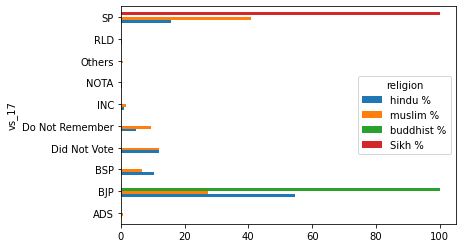

In [170]:
plt.figure(figsize =(12,6))
percentage.plot.barh();

### Find out the percentage of NA values in each column

In [161]:
na =(df.isnull().sum()/2000)*100
display(na)

submission_id        0.00
submission_date      0.00
ph_num               1.05
AC_num               0.05
AC                   0.05
age                  0.70
gender               0.35
religion             0.70
ls_19                1.60
vs_17                1.50
caste                1.20
satisfation_cm       1.25
satisfation_PM       1.30
mla_satisfaction    21.00
mla_choice           1.50
cm_choice            1.50
month                0.00
day                  0.00
dtype: float64

<AxesSubplot:>

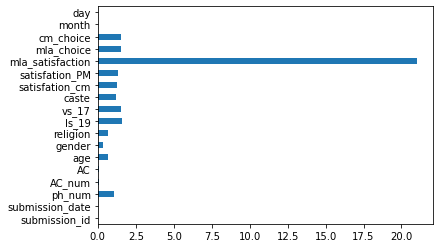

In [172]:
na.plot.barh()

### Find out the % of Males and % of Females who are unemployed and did not vote in vs_17 or ls_19

In [186]:
gender = df[['gender','ls_19','vs_17']].groupby('gender').count()
gender

,ls_19,vs_17
gender,,
Female,604,604
Male,1364,1364
Others,0,2


In [194]:
gender.iloc[]

,ls_19,vs_17
gender,,
Female,604,604
Male,1364,1364
Others,0,2


 ### Create a pie chart showcasing the number of votes obtained by each party in vs_17 and ls_19

In [216]:
pie =df[['vs_17','ls_19']].value_counts()
pie

vs_17            ls_19          
BJP              BJP                951
SP               MGB                278
BSP              MGB                152
Did Not Vote     Did Not Vote       131
SP               BJP                 74
Did Not Vote     BJP                 55
BJP              MGB                 53
Do Not Remember  BJP                 40
BSP              BJP                 38
Do Not Remember  Do Not Remember     31
Did Not Vote     MGB                 30
Do Not Remember  MGB                 17
INC              INC                 11
RLD              MGB                 10
BJP              Did Not Vote         9
SP               Did Not Vote         7
                 INC                  7
BJP              Others               6
INC              BJP                  5
BSP              Others               5
BJP              Do Not Remember      5
SP               Do Not Remember      4
NOTA             MGB                  4
ADS              BJP                  4
Do Not 

In [228]:
ls_19b = pie.groupby('ls_19').sum()
ls_19b

ls_19
BJP                1171
Did Not Vote        156
Do Not Remember      44
INC                  25
MGB                 550
NOTA                  2
Others               19
PSP                   1
dtype: int64

In [237]:
vs_17a =pie.groupby('vs_17').sum()
vs_17a

vs_17
ADS                   8
BJP                1026
BSP                 200
Did Not Vote        220
Do Not Remember     100
INC                  19
NOTA                  7
Others                1
RLD                  14
SP                  373
dtype: int64

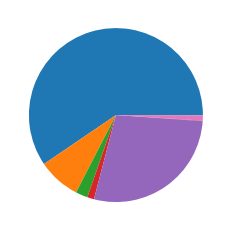

In [246]:
plt.pie(ls_19b);

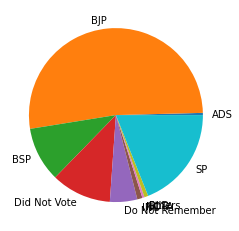

In [244]:
plt.pie(vs_17a,labels =label);

In [242]:
label=['ADS','BJP' ,  'BSP',   'Did Not Vote',  'Do Not Remember','INC','NOTA','Others','RLD','SP']  

### SQL 

#### Write an SQL query to return those rows from the dataframe where the parties of candidates mentioned in mla_choice is SP.

select * from dataset
where mla_choice like 'सपा%'

### Write an Sql query to return all the details of those entries in the dataset where phone number (ph_num) is duplicated.

select (*) ,count(ph_num) from dataset
groupby ph_num
having count(ph_num)>1